In [1]:
##%matplotlib widget

import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunctions

# if False:
!ping -c 1 192.168.10.16
if True:
    import clicfast2023.clicfast2023 as clicfast2023
    dut = clicfast2023.Clicfast2023()
    dut.init()
    en_comp = np.copy(dut.PixelConf['en_comp'])
    tdac = np.copy(dut.PixelConf['tdac'])

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
64 bytes from 192.168.10.16: icmp_seq=1 ttl=64 time=0.091 ms

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.091/0.091/0.091/0.000 ms


2024-05-28 09:51:43,580 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing spi_inj (firmware version: 2), module basil.HL.spi, base_addr 0x10
2024-05-28 09:51:43,581 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing inj (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x100
2024-05-28 09:51:43,581 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing trig (firmware version: 1), module clicfast2023.pulse_gen_delay, base_addr 0x2c0
2024-05-28 09:51:43,582 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing sync (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x140
2024-05-28 09:51:43,582 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gate (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x180
2024-05-28 09:51:43,583 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing ts_inj (firmware version: 2), module basil.HL.timestamp, base_ad

In [2]:
dut.set_conf(VDACTh=0x64,
             VDACBL=0x8C,
             BLResP=1,
             IPBigFine=19,
             IPSmallFine=7,
             IPFoll=0,
             IPDAC=8,
             NFB2=10,
             PFB1=10,
             Invert=0)
col = 1
comp = 1
delay = 10
dut.set_sync()
dut.set_inj(inj_n=0, inj_delay=1024*8-delay, inj_width=1024*8-delay, ext=True)
dut.set_triginj(inj_n=1, inj_delay=(1024*8+delay)*4, inj_width=(1024*8-delay)*4, ext=True)
dut.set_inj_amp(1.0, unit="V")
#dut.inject_trig()
dut.inject()
dut.set_en_ampout([])
dut.set_en_inj([col])
dut.set_en_hitbus([])

#dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] = 0
en_comp[col, :] = 1  ## enable all comp
#dut.PixelConf['tdac'][:, :] = 0xFF
tdac = np.copy(dut.PixelConf['tdac'])
tdac[:, :] = 7
tdac[col, :] = 7  ## enable all comp
dut.set_ram(en_comp=en_comp, tdac=tdac)

2024-05-28 09:51:45,952 - root - [INFO    ] (MainThread) set_conf:VDACTh=100VDACBL=140BLResP=1IPBigFine=19IPSmallFine=7IPFoll=0IPDAC=8NFB2=10PFB1=10Invert=0


2024-05-28 09:51:46,057 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-05-28 09:51:46,059 - root - [INFO    ] (MainThread) set_inj: inj_width=8182 inj_delay=8182 inj_n=0 ext=1
2024-05-28 09:51:46,060 - root - [INFO    ] (MainThread) set_triginj: trig_width=32728 trig_delay=32808 trig_n=1 ext=1
2024-05-28 09:51:46,061 - root - [INFO    ] (MainThread) inj_amp: 4573
2024-05-28 09:51:46,066 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000000
2024-05-28 09:51:46,071 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000002
2024-05-28 09:51:46,076 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1fffffff
2024-05-28 09:51:46,087 - root - [INFO    ] (MainThread) set_ram row0 en_comp[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-05-28 09:51:46,098 - root - [INFO    ] (MainThread) set_ram row1 en_comp[0 1 0 

In [3]:
dut.set_inj(inj_n=100, inj_delay=1024*8+delay, inj_width=1024*8-delay, ext=True)
dut.set_triginj(inj_n=10, inj_delay=(1024*8+delay)*4, inj_width=(1024*8+delay)*4, ext=False)

dut.inject()
dut.inject_trig()
dut.set_rx(False)
dut.set_sync(auto_sync=True)
dut.set_ts_trig(True)
dut.set_ts_inj(True)
dut.set_rx(True, edge=0)

2024-05-28 09:51:49,354 - root - [INFO    ] (MainThread) set_inj: inj_width=8182 inj_delay=8202 inj_n=100 ext=1
2024-05-28 09:51:49,355 - root - [INFO    ] (MainThread) set_triginj: trig_width=32808 trig_delay=32808 trig_n=10 ext=0
2024-05-28 09:51:49,457 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-05-28 09:51:49,458 - root - [INFO    ] (MainThread) set_ts_trig:1
2024-05-28 09:51:49,459 - root - [INFO    ] (MainThread) set_ts_inj:1
2024-05-28 09:51:49,460 - root - [INFO    ] (MainThread) set_rx: FIFO is not empty(28), try to discard the data...
2024-05-28 09:51:49,594 - root - [INFO    ] (MainThread) set_rx: FPGA alined: aligned=1


## Debug data_rx (read data directly) 

### check noise

In [4]:
importlib.reload(interpreter)
dut.mask_rx(False)
#dut.inject()
time.sleep(1)
raw=dut.get_data_now()
dut.mask_rx(True)
hit, ts, ts_trig =interpreter.raw2list(raw)
len(raw), len(hit), len(ts), len(ts_trig)

(0, 0, 0, 0)

### check injection

In [5]:
importlib.reload(interpreter)
dut.set_inj_amp(1.5)
dut.mask_rx(False)
dut.inject()
#time.sleep(1)
raw=dut.get_data()
dut.mask_rx(True)
hit, ts, ts_trig =interpreter.raw2list(raw)
len(raw), len(hit), len(ts), len(ts_trig), np.unique(hit['comp'])

2024-05-28 09:52:03,084 - root - [INFO    ] (MainThread) inj_amp: 6142


(6300,
 1200,
 100,
 0,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint16))

#### check data

In [39]:
hit[:12]

array([( 7, 1,  0, 15, 15, 19,  98,  8445, 0),
       (12, 1,  1, 15, 15, 19, 101,  8615, 0),
       (17, 1,  2, 15, 15, 19,  97,  8785, 0),
       (22, 1,  3, 15, 15, 19,  23,  8955, 0),
       (27, 1,  4, 15, 15, 19,  17,  9125, 0),
       (32, 1,  5, 15, 15, 19,  95,  9295, 0),
       (37, 1,  6, 15, 15, 19,  93,  9465, 0),
       (42, 1,  7, 15, 15, 19,  97,  9635, 0),
       (47, 1,  8, 15, 15, 19,  95,  9805, 0),
       (52, 1,  9, 15, 15, 19, 103,  9975, 0),
       (57, 1, 10, 16, 15, 18,  43, 10145, 0),
       (62, 1, 11, 15, 15, 19,  16, 10315, 0)],
      dtype=[('event_number', '<i8'), ('col', 'u1'), ('comp', '<u2'), ('ts11', '<u2'), ('ts12', '<u2'), ('ts2', '<u2'), ('ts3', 'u1'), ('timestamp', '<u2'), ('err', 'u1')])

In [9]:
for i, r in enumerate(raw[raw & 0xF000_0000==0x1000_0000]):
    if i%5==4:
        end = '\n'
    else:
        end =' '
    print(hex(r), end=end)


0x11aac040 0x12f78cc1 0x1305ffb0 0x14201802 0x15005c5c
0x11aac041 0x12a170c1 0x1305ff10 0x14201802 0x15005c5c
0x11aac042 0x124b6ec1 0x1305fe92 0x14201802 0x15005c5c
0x11aac042 0x12f58ec1 0x1305fe33 0x14201802 0x15005c5c
0x11aac043 0x129f50c1 0x1305fd96 0x14201802 0x15005c5c
0x11aac044 0x12496cc1 0x1305fd10 0x14201802 0x15005c5c
0x11aac044 0x12f38ac1 0x1305fc97 0x14201802 0x15005c5c
0x11aac045 0x129d52c1 0x1305fc10 0x14201802 0x15005c5c
0x11aac046 0x124764c1 0x1305fb92 0x14201802 0x15005c5c
0x11aac046 0x12f188c1 0x1305fb30 0x14201802 0x15005c5c
0x11aac047 0x129b56c1 0x1305fa90 0x14201802 0x15005c5c
0x11aac048 0x124566c1 0x1305fa10 0x14201802 0x15005c5c
0x11aac080 0x12cbaec1 0x1305ff90 0x14201802 0x15005c5c
0x11aac081 0x1275cec1 0x1305ff11 0x14201802 0x15005c5c
0x11aac082 0x121f10c1 0x1305fe92 0x14201802 0x15005c5c
0x11aac082 0x12c9acc1 0x1305fe31 0x14201802 0x15005c5c
0x11aac083 0x1273cac1 0x1305fd96 0x14201802 0x15005c5c
0x11aac084 0x121d12c1 0x1305fd10 0x14201802 0x15005c5c
0x11aac084

## s-curve scan

In [6]:
import importlib
import clicfast2023.scans.th_scan as th_scan
importlib.reload(th_scan)
scan = th_scan.ThScan(dut=dut)
fraw = scan.start(inj=[0.015, 0.025, 1.5],
                  tdac=[7],
                  cols=[1,2,3,4,5,6,7,8,9,10,11], #np.arange(0, dut.ncols, 1, dtype='i'), 
                  #cols=None,
                  comps=None,
                  plsgen='inj')

2024-05-28 09:52:38,684 - root - [INFO    ] (MainThread) Initializing ThScan
2024-05-28 09:52:38,684 - root - [INFO    ] (MainThread) Scan start time: 2024-05-28_09:52:38
2024-05-28 09:52:38,702 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2024-05-28 09:52:38,845 - root - [INFO    ] (MainThread) set_rx: FPGA alined: aligned=1
2024-05-28 09:52:38,846 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/clicfast2023/scans/th_scan.py:123: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  param_dtype = np.dtype(param_dtype)
2024-05-28 09:52:38,948 - root - [INFO    ] (MainThread) Received words: 0
2024-05-28 09:52:38,948 - root - [INFO    ] (MainThread) Data queue size: 0
2024-05-28 09:52:38,948 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-05-28 09:

In [2]:
scan.close()

NameError: name 'scan' is not defined

2024-05-28 10:43:59,525 - root - [INFO    ] (MainThread) interpreted /home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/th_scan/20240528_095238_th_hit.h5
2024-05-28 10:43:59,539 - root - [INFO    ] (MainThread) 0.01s hit=212825/212825 event=212825 ts=48000/48000
2024-05-28 10:43:59,539 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/th_scan/20240528_095238_th_hit.h5


0.01s 1208142/1208142 hit=212825 ts=48000 trig=0


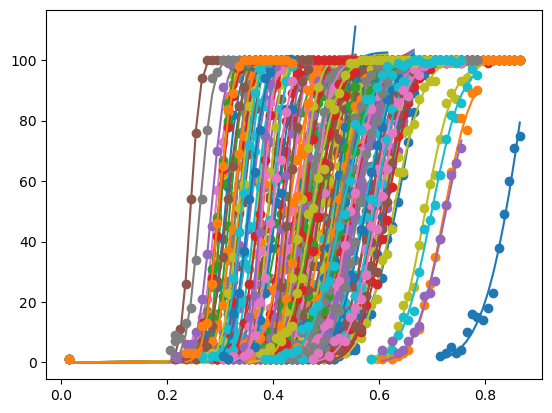

In [98]:
import clicfast2023.analysis.data_loader as data_loader
importlib.reload(data_loader)
#fraw='/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/th_scan/20240527_190748_th_scan.h5'
#fraw = '/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/th_scan/20240527_205727_th_scan.h5'
fraw, fhit = data_loader.get_filename(fraw, datdir=None)

data_loader.analyze(fraw, fhit)
dat=data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
res_dtype = [('col', 'i'),('comp', 'i'),('quick_th', 'f'),('fit', 'f', 6)]
if len(param)>3:
    names = [*param.dtype.names[3:]]
    for n in names:
        res_dtype.append((n, param.dtype['cols'], param.dtype['cols'].shape))
else:
    names = []
    unipara=[0] ## dummy
res = np.empty(len(param)*data_loader.NCOMPS, dtype=res_dtype)
unipara=np.unique(param[['tdac']])
i = 0
for up in unipara:
    #ev = param['scan_param_id'][param['tdac']==up]
    #print(ev)
    #dat1 = dat[np.isin(dat['event_number'], ev)]
    unipix = np.unique(dat[['col','comp']])
    #if True:
    for u_i, upix in enumerate(unipix):
        dat0 = dat[dat[['col', 'comp']]==upix]
        uni, nhit = np.unique(dat0['event_number'], return_counts=True)
        arg = np.argsort(param['inj'][uni])
        x = param['inj'][uni][arg]
        y = nhit[arg]
        plt.plot(x, y, 'C{}o'.format(i%10),label='{}'.format(upix))
        try:
            res[i]['fit'] = fitfunctions.fit_scurve(x, y, A=100, reverse=False)
            plt.plot(x, fitfunctions.scurve(x, *res[i]['fit'][:3]), 'C{}-'.format(i%10))
        except:
            print('fitting error', upix)
            #plt.plot(x, fitfunctions.scurve(x, A=100, mu=0.5), '-')
            res[i]['fit'] = [np.nan]*6
        res[i]['col']=upix['col']
        res[i]['comp']=upix['comp']
        res[i]['quick_th']=fitfunctions.find_value(x, fitfunctions.find_arg(y, 50))
        for n in up.dtype.names:
            res[i][n]=up[n]
        i = i + 1

#plt.legend()
res = res[:i]


132

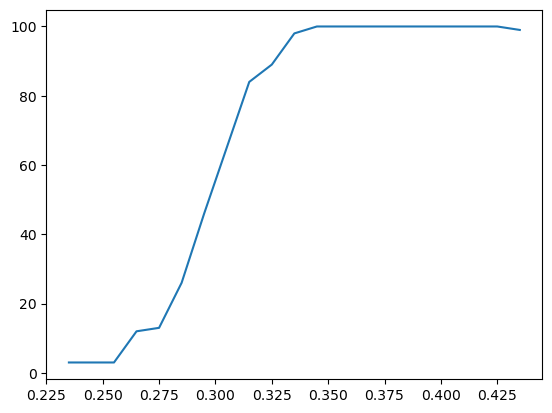

In [106]:
plt.plot(x,y)
#fitfunctions.fit_scurve(x,y, reverse=False)
#fitfunctions.fit_scurve(x,y, reverse=False)
fit = fitfunctions.fit_scurve(x, y, reverse=False)

res[i-1]['fit'] = fitfunctions.fit_scurve(x, y, reverse=False)
i

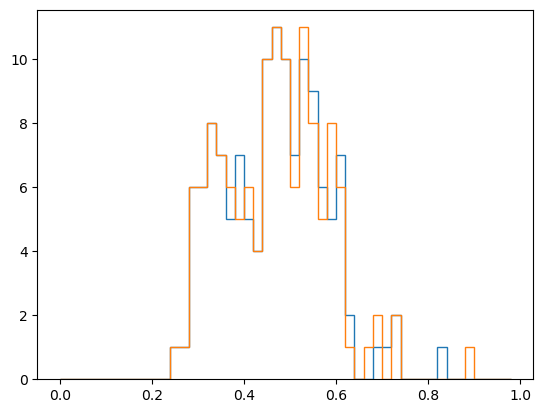

In [113]:
bins = np.arange(0, 1, 0.02)
hist = plt.hist(res['quick_th'], bins=bins, histtype='step');
hist = plt.hist(res['fit'][:,1], bins=bins, histtype='step');
x = hist[1][1:]

In [20]:
import importlib
import clicfast2023.scans.injection_scan as injection_scan
importlib.reload(injection_scan)
scan = injection_scan.InjectionScan(dut=dut)
fraw = scan.start(inj=np.arange(0.02, 1.5, 0.01),
                  tdac=[7, 0],
                  #cols=[1,2,3,4,5,6,7,8,9,10,11], #np.arange(0, dut.ncols, 1, dtype='i'), 
                  cols=None,
                  comps=None,
#                  tdac=[7,6,5,4,3,2,1,0]
                  plsgen='inj')
fhit = scan.analyze()

2024-05-28 09:51:10,962 - root - [INFO    ] (MainThread) Initializing InjectionScan
2024-05-28 09:51:10,962 - root - [INFO    ] (MainThread) Scan start time: 2024-05-28_09:51:10
2024-05-28 09:51:10,980 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2024-05-28 09:51:10,981 - root - [INFO    ] (MainThread) set_rx: FIFO is not empty(40), try to discard the data...
2024-05-28 09:51:11,113 - root - [INFO    ] (MainThread) set_rx: FPGA alined: aligned=1
2024-05-28 09:51:11,114 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-05-28 09:51:11,116 - root - [INFO    ] (MainThread) set_ts_trig:1
2024-05-28 09:51:11,117 - root - [INFO    ] (MainThread) set_ts_inj:1
2024-05-28 09:51:11,260 - root - [INFO    ] (MainThread) set_rx: FPGA alined: aligned=1
2024-05-28 09:51:11,361 - root - [INFO    ] (MainThread) Received words: 0
2024-05-28 09:51:11,362 - root - [INFO    ] (MainThread) Data queue size: 0
2024-05-28 09:51:11,362 - root - [I

KeyboardInterrupt: 

In [37]:
enpix=np.argwhere(extra_param['PixelConf.en_comp'])

In [54]:
dtype=[('fit','f',6),('quick_th', 'f'), ('col', 'i'), ('comp', 'i')]
names= [*param.dtype.names[3:]]
for n in names:
    dtype.append((n, param.dtype[n]))
ret = np.empty(len(unipara)*12*29, dtype=dtype)
r_i = 0
unipara=np.unique(param[names])
for up in unipara:
    ev = param['scan_param_id'][param[[*param.dtype.names[3:]]]==up ]
    dat1= dat[np.isin(dat['event_number'], ev)]

    unipix = np.unique(dat1[['col','comp']])
    for u_i, upix in enumerate(unipix):

        dat0 = dat1[dat1[['col', 'comp']]==upix]
        if upix[0] not in enpix[:,0] or upix[1] not in enpix[:,1]:
            print('trash', upix, len(dat0))
            continue
        uni, nhit = np.unique(dat0['event_number'], return_counts=True)
        arg = np.argsort(param['inj'][uni])
        x = param['inj'][uni][arg]
        y = nhit[arg]
        plt.plot(x, y, 'o-')
        ret[r_i]['quick_th'] = fitfunctions.find_value(x, fitfunctions.find_arg(y,50))
        ret[r_i]['col']=upix['col']
        ret[r_i]['comp']=upix['comp']
        for n in names:
            ret[r_i][n]=up[n]
    plt.title('{} {}'.format(upix, up))
    plt.savefig('{}-{}.png'.format(upix, up))
    plt.close()



In [47]:
#np.isin(upix, enpix[0])
upix[0] in enpix[:,0] and upix[1] in enpix[:,1]

True

ValueError: `ydata` must not be empty!

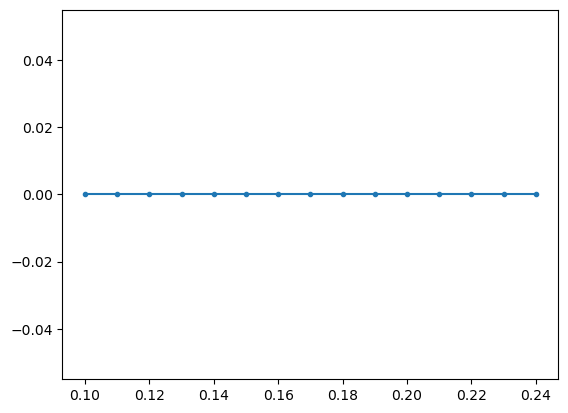

In [45]:
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

for comp_i in range(dut.ncomps):
    dat0 = dat[dat['comp']==comp_i]
    uni, idx= np.unique(dat0['timestamp'], return_index=True)
    #dat0 = dat0[idx]
    nhit = np.bincount(dat0['event_number'], minlength=len(param))
    arg=np.argsort(param['inj'])
    plt.plot(param['inj'][arg], nhit[arg], 'C{}.-'.format(comp_i))
    fit = fitfunc.fit_scurve(param['inj'][arg], nhit[arg], reverse=False)
    x = np.linspace(np.min(param['inj']),np.max(param['inj']),100)
    #plt.plot(x,fitfunc.scurve(x, *fit[:3]))
    if comp_i==1:
        break

plt.xlabel('Injection[V]')
plt.ylabel('#')
plt.legend()

In [46]:
nhit[arg]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
np.bincount(dat0['event_number'], minlength=len(param))
param[dat0['event_number']]['inj']

array([0.115, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.095, 0.105,
       0.105, 0.105, 0.115, 0.115, 0.115, 0.115, 0.115, 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ], dtype=float32)

In [6]:
import clicfast2023.analysis.interpreter as interpreter
importlib.reload(interpreter)
fraw = '/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/injection_scan/20240415_185741_injection_scan.h5'
fhit = fraw[:-7]+'hit.h5'
interpreter.interpret_h5(fraw, fhit)

FileNotFoundError: ``/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/injection_scan/20240415_185741_injection_scan.h5`` does not exist

In [20]:
import clicfast2023.analysis.event_builder as event_builder
importlib.reload(event_builder)
event_builder.build_h5(fraw, fhit)

2024-04-15 19:15:23,848 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=37
2024-04-15 19:15:23,850 - root - [INFO    ] (MainThread) 0.12s hit=153631/153631 event=153594 ts=12800/12800


In [19]:
dut.set_phase(128)
dut.set_phase(129)
dut.set_phase(130)
hex(dut['trig']["DELAY"] & 0xFFFC), hex(int(130//32))

2024-04-15 20:14:03,506 - root - [INFO    ] (MainThread) set_phase: trig_width=0x2a40 trig_delay=0x25c0 phase=0
2024-04-15 20:14:03,507 - root - [INFO    ] (MainThread) set_phase: trig_width=0x2a44 trig_delay=0x25bc phase=1
2024-04-15 20:14:03,508 - root - [INFO    ] (MainThread) set_phase: trig_width=0x2a48 trig_delay=0x25b8 phase=2


('0x2a48', '0x4')

Text(0.5, 1.0, 'Comparator1')

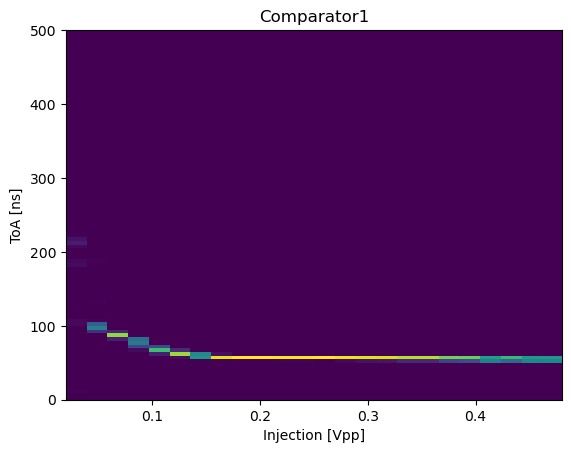

In [238]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
toa = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    toa[:,i] = np.bincount(ev['toa'], minlength=n)[:n]

plt.imshow(toa, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator1')


Text(0.5, 1.0, 'Comparator1')

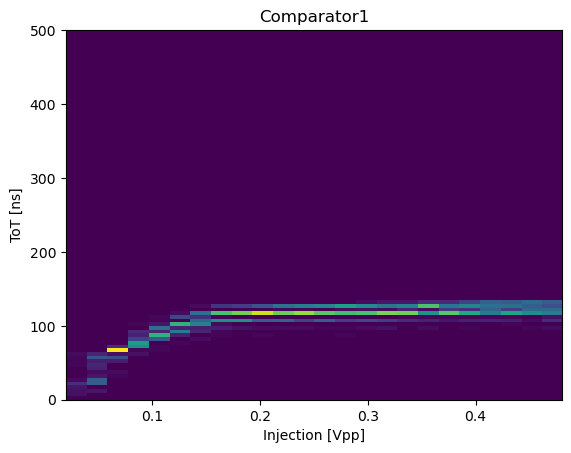

In [239]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
tot = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    tot[:,i] = np.bincount(ev['tot'], minlength=n)[:n]

plt.imshow(tot, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToT [ns]')
plt.title('Comparator1')


In [26]:
dut.set_rx(False)

In [15]:
256/32/4

2.0